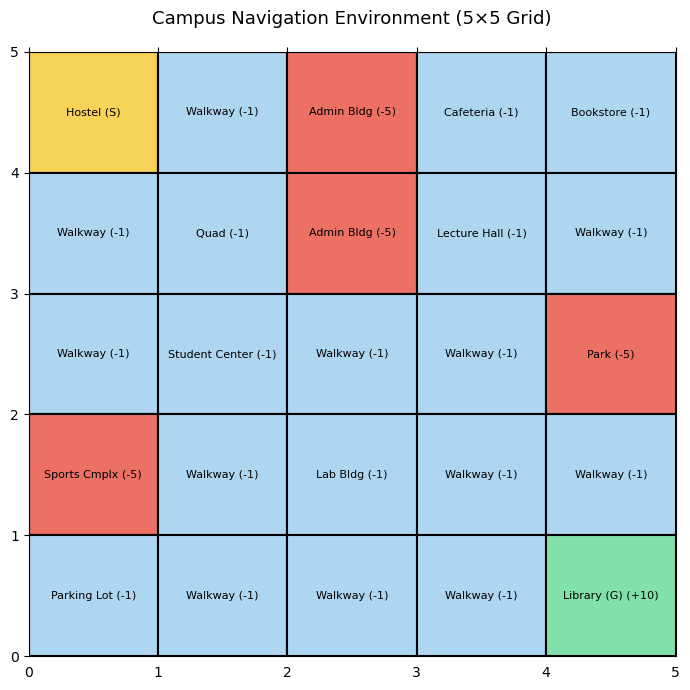

In [22]:
# CAMPUS NAVIGATION ENVIRONMENT 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

#  Grid dimensions
rows, cols = 5, 5

#  Define locations (row, col)
START = (0, 0)     # Hostel (Yellow)
GOAL = (4, 4)      # Library (Green)
OBSTACLES = [(0, 2), (1, 2), (2, 4), (3, 0)]  # Admin, Admin, Park, Sports
ACTIONS = [
    (-1, 0),  # Up
    (1, 0),   # Down
    (0, -1),  # Left
    (0, 1)    # Right
]


#  Create a color map (like your image)
def cell_color(pos):
    if pos == START:
        return '#f7d358'   # Yellow (Hostel)
    elif pos == GOAL:
        return '#82e0aa'   # Green (Library)
    elif pos in OBSTACLES:
        return '#ec7063'   # Red (Obstacles)
    else:
        return '#aed6f1'   # Light Blue (Walkway)

#  Cell labels (for realistic look)
cell_labels = {
    (0, 0): "Hostel (S)",
    (0, 1): "Walkway (-1)",
    (0, 2): "Admin Bldg (-5)",
    (0, 3): "Cafeteria (-1)",
    (0, 4): "Bookstore (-1)",

    (1, 0): "Walkway (-1)",
    (1, 1): "Quad (-1)",
    (1, 2): "Admin Bldg (-5)",
    (1, 3): "Lecture Hall (-1)",
    (1, 4): "Walkway (-1)",

    (2, 0): "Walkway (-1)",
    (2, 1): "Student Center (-1)",
    (2, 2): "Walkway (-1)",
    (2, 3): "Walkway (-1)",
    (2, 4): "Park (-5)",

    (3, 0): "Sports Cmplx (-5)",
    (3, 1): "Walkway (-1)",
    (3, 2): "Lab Bldg (-1)",
    (3, 3): "Walkway (-1)",
    (3, 4): "Walkway (-1)",

    (4, 0): "Parking Lot (-1)",
    (4, 1): "Walkway (-1)",
    (4, 2): "Walkway (-1)",
    (4, 3): "Walkway (-1)",
    (4, 4): "Library (G) (+10)",
}

#  Plot the grid
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)

# Draw each cell with color
for r in range(rows):
    for c in range(cols):
        rect = Rectangle((c, rows - 1 - r), 1, 1,
                         facecolor=cell_color((r, c)), edgecolor='black', linewidth=1.5)
        ax.add_patch(rect)
        label = cell_labels.get((r, c), "")
        ax.text(c + 0.5, rows - 1 - r + 0.5, label,
                ha='center', va='center', fontsize=8, wrap=True)

#  Add grid lines
ax.set_xticks(np.arange(0, cols + 1, 1))
ax.set_yticks(np.arange(0, rows + 1, 1))
ax.grid(True, which='both', color='black', linewidth=1.2)

#  Move tick labels to top
ax.tick_params(top=True, bottom=False, labeltop=False, labelbottom=True)

# Title
ax.set_title("Campus Navigation Environment (5×5 Grid)", fontsize=13, pad=20)

plt.tight_layout()
plt.show()


====== Q-LEARNING RESULTS ======
Optimal Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4)]
Total Cost: 3

Q-Learning Q-Table:
(0, 0) [-3.3967326  -0.43670981 -3.3967326  -3.03841249]
(0, 1) [-2.92599253 -2.42635593 -2.58958727 -2.92599253]
(0, 2) [0. 0. 0. 0.]
(0, 3) [-0.5       -0.392509  -0.5       -0.2992699]
(0, 4) [-0.5       -0.3973204 -0.321067  -0.5      ]
(1, 0) [-2.42763105 -2.42165582 -2.45049751  0.62791434]
(1, 1) [-1.99770614  1.80953587 -2.07965575 -2.45049751]
(1, 2) [0. 0. 0. 0.]
(1, 3) [-0.3699829  -0.39178    -0.5        -0.38529846]
(1, 4) [-0.38701234 -0.5        -0.407089   -0.5       ]
(2, 0) [-1.90890492 -1.9701995  -1.9701995  -1.70287228]
(2, 1) [-1.36696491 -1.36580581 -1.4371726   3.12193617]
(2, 2) [-0.995       4.57998773 -0.83485794 -0.73796004]
(2, 3) [-0.3772      0.02739926 -0.43020868 -0.5       ]
(2, 4) [0. 0. 0. 0.]
(3, 0) [0. 0. 0. 0.]
(3, 1) [-0.79777945 -0.75955259 -0.995      -0.42302183]
(3, 2) [-0.41582176 -0.3419

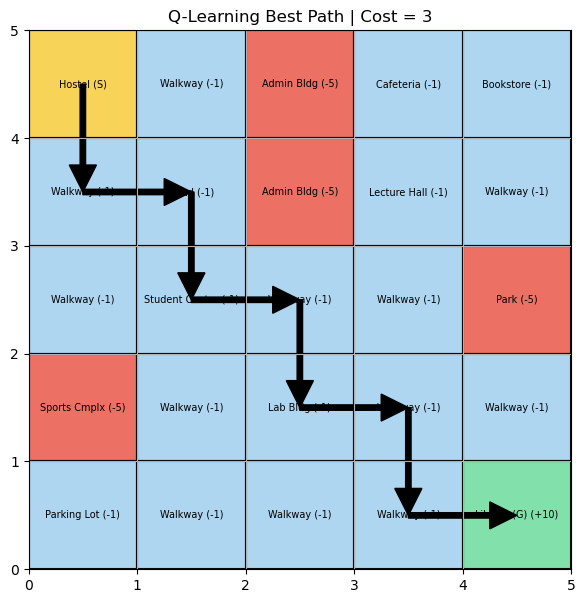

In [23]:
# =======================
# Q-LEARNING
# =======================

alpha, gamma, episodes = 0.1, 0.9, 200
Q_q = np.zeros((rows, cols, len(ACTIONS)))
q_rewards = []

for ep in range(episodes):
    s = START
    done = False
    total_reward = 0

    while not done:
        a = np.argmax(Q_q[s])
        ns, r, done = step(s, ACTIONS[a])
        Q_q[s][a] += alpha * (r + gamma*np.max(Q_q[ns]) - Q_q[s][a])
        total_reward += r
        s = ns

    q_rewards.append(total_reward)

# Extract best path
s = START
path_q = [s]
cost_q = 0

while s != GOAL:
    a = np.argmax(Q_q[s])
    ns, r, _ = step(s, ACTIONS[a])
    if ns == s or ns in path_q:
        break
    path_q.append(ns)
    cost_q += r
    s = ns

print("\n====== Q-LEARNING RESULTS ======")
print("Optimal Path:", path_q)
print("Total Cost:", cost_q)


print("\nQ-Learning Q-Table:")
for r in range(rows):
    for c in range(cols):
        print((r, c), Q_q[r, c])

# ----- Arrow Visualization -----
def visualize_q_path(path, total_cost):
    fig, ax = plt.subplots(figsize=(7, 7))

    for r in range(rows):
        for c in range(cols):
            ax.add_patch(Rectangle((c, rows-1-r), 1, 1,
                                   facecolor=cell_color((r, c)),
                                   edgecolor='black', linewidth=1.5))

            if (r, c) in cell_labels:
                ax.text(c+0.5, rows-1-r+0.5, cell_labels[(r, c)],
                        ha='center', va='center', fontsize=7)

    # ARROWS
    for i in range(len(path)-1):
        r1, c1 = path[i]
        r2, c2 = path[i+1]

        ax.add_patch(FancyArrow(
            c1+0.5, rows-1-r1+0.5, (c2-c1), -(r2-r1),
            width=0.05, head_width=0.25, head_length=0.25,
            color='black', length_includes_head=True))

    ax.set_title(f"Q-Learning Best Path | Cost = {total_cost}")
    ax.set_xticks(range(cols+1))
    ax.set_yticks(range(rows+1))
    ax.grid(True)

    plt.show()

visualize_q_path(path_q, cost_q)



====== SARSA RESULTS ======
Optimal Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4)]
Total Cost: 3

SARSA Q-Table:
(0, 0) [-3.69395969 -0.43671076 -3.70017342 -3.05007094]
(0, 1) [-2.79782853 -2.41964363 -2.58747687 -2.80979614]
(0, 2) [0. 0. 0. 0.]
(0, 3) [-0.95      -0.392509  -0.95      -0.2992699]
(0, 4) [-0.95      -0.3973204 -0.321067  -0.959    ]
(1, 0) [-2.41999291 -2.42630436 -2.798872    0.6279141 ]
(1, 1) [-2.10987967  1.80953583 -2.08043871 -2.80925717]
(1, 2) [0. 0. 0. 0.]
(1, 3) [-0.3699829  -0.39178    -0.95       -0.38529846]
(1, 4) [-0.38701234 -0.95       -0.407089   -0.959     ]
(2, 0) [-1.9149789  -2.79632345 -2.79802782 -1.7219736 ]
(2, 1) [-1.36692141 -1.36694542 -1.43528998  3.12193616]
(2, 2) [-0.95        4.57998773 -0.83475907 -0.73796004]
(2, 3) [-0.3772      0.02739926 -0.4333625  -0.959     ]
(2, 4) [0. 0. 0. 0.]
(3, 0) [0. 0. 0. 0.]
(3, 1) [-0.79777981 -0.75955259 -0.95       -0.40355487]
(3, 2) [-0.41582176 -0.3419731  -0.45

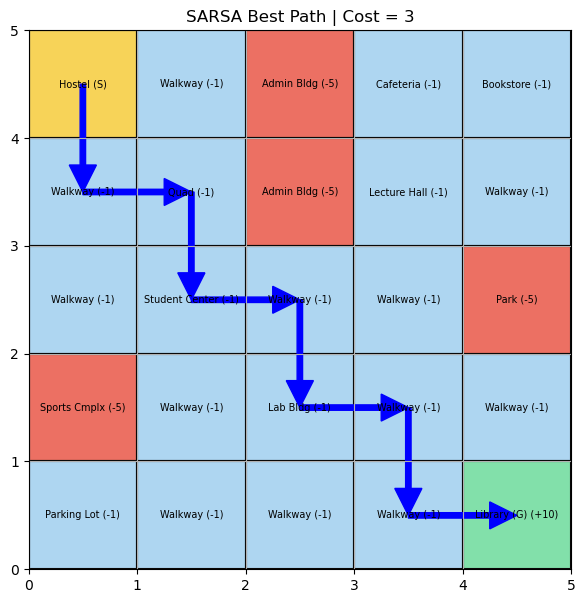

In [24]:
# =======================
# SARSA
# =======================

alpha, gamma, episodes = 0.1, 0.9, 200
Q_s = np.zeros((rows, cols, len(ACTIONS)))
sarsa_rewards = []

for ep in range(episodes):
    s = START
    a = np.argmax(Q_s[s])
    done = False
    total_reward = 0

    while not done:
        ns, r, done = step(s, ACTIONS[a])
        na = np.argmax(Q_s[ns])
        Q_s[s][a] += alpha * (r + gamma*Q_s[ns][na] - Q_s[s][a])
        total_reward += r
        s, a = ns, na

    sarsa_rewards.append(total_reward)

# Best path
s = START
path_s = [s]
cost_s = 0

while s != GOAL:
    a = np.argmax(Q_s[s])
    ns, r, _ = step(s, ACTIONS[a])
    if ns == s or ns in path_s:
        break
    path_s.append(ns)
    cost_s += r
    s = ns

print("\n====== SARSA RESULTS ======")
print("Optimal Path:", path_s)
print("Total Cost:", cost_s)

print("\nSARSA Q-Table:")
for r in range(rows):
    for c in range(cols):
        print((r, c), Q_s[r, c])
# ---- Arrow Visualization -----

def visualize_sarsa_path(path, total_cost):
    fig, ax = plt.subplots(figsize=(7, 7))

    for r in range(rows):
        for c in range(cols):
            ax.add_patch(Rectangle((c, rows-1-r), 1, 1,
                                   facecolor=cell_color((r, c)),
                                   edgecolor='black', linewidth=1.5))

            if (r, c) in cell_labels:
                ax.text(c+0.5, rows-1-r+0.5, cell_labels[(r, c)],
                        ha='center', va='center', fontsize=7)

    # ARROWS
    for i in range(len(path)-1):
        r1, c1 = path[i]
        r2, c2 = path[i+1]

        ax.add_patch(FancyArrow(
            c1+0.5, rows-1-r1+0.5, (c2-c1), -(r2-r1),
            width=0.05, head_width=0.25, head_length=0.25,
            color='blue', length_includes_head=True))

    ax.set_title(f"SARSA Best Path | Cost = {total_cost}")
    ax.set_xticks(range(cols+1))
    ax.set_yticks(range(rows+1))
    ax.grid(True)

    plt.show()

visualize_sarsa_path(path_s, cost_s)



====== MONTE CARLO RESULTS ======
Optimal Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)]
Total Cost: 3


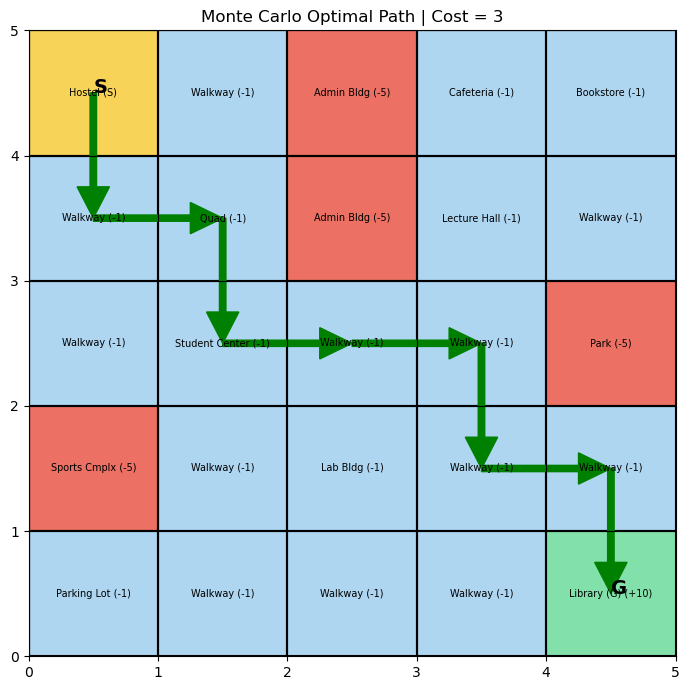

In [25]:
# ============================================================
# MONTE CARLO TRAINING  (same as your code)
# ============================================================

alpha, gamma, episodes = 0.1, 0.9, 150
Q_mc = np.zeros((rows, cols, len(ACTIONS)))
mc_rewards = []

for ep in range(episodes):
    s, done = START, False
    episode = []

    while not done:
        a = np.random.choice(len(ACTIONS))
        ns, r, done = step(s, ACTIONS[a])
        episode.append((s, a, r))
        s = ns

    G = 0
    for s, a, r in reversed(episode):
        G = r + gamma * G
        Q_mc[s][a] += alpha * (G - Q_mc[s][a])

    mc_rewards.append(sum([r for (_, _, r) in episode]))

# ============================================================
# DERIVE OPTIMAL PATH  (same as your code)
# ============================================================

path_mc, cost_mc, s = [START], 0, START
while s != GOAL:
    a = np.argmax(Q_mc[s])
    ns, r, done = step(s, ACTIONS[a])
    if ns == s or ns in path_mc:
        break
    path_mc.append(ns)
    cost_mc += r
    s = ns
    if done:
        break

print("\n====== MONTE CARLO RESULTS ======")
print("Optimal Path:", path_mc)
print("Total Cost:", cost_mc)

# ============================================================
# UPDATED VISUALIZATION (with names + arrows)
# ============================================================

def visualize_mc_path(path, total_cost):
    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw grid with colors and labels (same as Q-Learning)
    for r in range(rows):
        for c in range(cols):
            rect = Rectangle((c, rows - 1 - r), 1, 1,
                             facecolor=cell_color((r, c)),
                             edgecolor='black', lw=1.5)
            ax.add_patch(rect)

            # Add text labels (buildings, walkway names, penalties)
            if (r, c) in cell_labels:
                ax.text(c + 0.5,
                        rows - 1 - r + 0.5,
                        cell_labels[(r, c)],
                        fontsize=7,
                        ha='center', va='center', wrap=True)

    # Draw ARROWS (consistent with Q,S,TD)
    for i in range(len(path) - 1):
        r1, c1 = path[i]
        r2, c2 = path[i + 1]

        ax.add_patch(FancyArrow(
            c1 + 0.5,
            rows - 1 - r1 + 0.5,
            (c2 - c1),
            -(r2 - r1),
            width=0.05,
            head_width=0.25,
            head_length=0.25,
            color='green',
            length_includes_head=True
        ))

    # Start & Goal
    ax.text(START[1] + 0.5, rows - 1 - START[0] + 0.5,
            "S", fontsize=14, fontweight='bold')
    ax.text(GOAL[1] + 0.5, rows - 1 - GOAL[0] + 0.5,
            "G", fontsize=14, fontweight='bold')

    ax.set_xticks(range(cols + 1))
    ax.set_yticks(range(rows + 1))
    ax.grid(True, color='black')
    ax.set_title(f"Monte Carlo Optimal Path | Cost = {total_cost}")

    plt.tight_layout()
    plt.show()

# Call visualization
visualize_mc_path(path_mc, cost_mc)



====== TD(λ) RESULTS ======
Optimal Path: [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]
Total Cost: 3


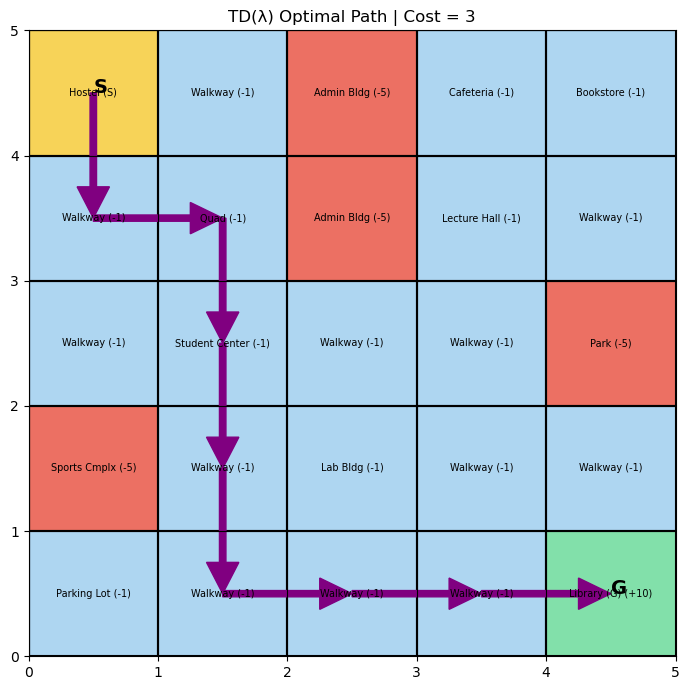

In [26]:
# =======================
# TEMPORAL DIFFERENCE (TD-λ)
# =======================

alpha = 0.1
gamma = 0.9
lamda = 0.8
epsilon = 0.1
episodes = 150

Q = np.zeros((rows, cols, len(ACTIONS)))
rewards = []

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(len(ACTIONS))
    return np.argmax(Q[state])

for ep in range(episodes):
    s = START
    a = choose_action(s)
    E = np.zeros_like(Q)
    total_reward = 0
    done = False

    while not done:
        ns, r, done = step(s, ACTIONS[a])
        na = choose_action(ns)

        delta = r + gamma * Q[ns][na] - Q[s][a]
        E[s][a] += 1

        Q += alpha * delta * E
        E *= gamma * lamda

        total_reward += r
        s, a = ns, na

    rewards.append(total_reward)

# Path extraction
s = START
path_td = [s]
cost_td = 0

while s != GOAL:
    a = np.argmax(Q[s])
    ns, r, _ = step(s, ACTIONS[a])
    if ns == s or ns in path_td:
        break
    path_td.append(ns)
    cost_td += r
    s = ns

print("\n====== TD(λ) RESULTS ======")
print("Optimal Path:", path_td)
print("Total Cost:", cost_td)

# ==========================================
# ARROW-STYLE VISUALIZATION (UPDATED)
# ==========================================

def visualize_td_path(path, total_cost):
    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw grid
    for r in range(rows):
        for c in range(cols):
            ax.add_patch(Rectangle((c, rows - 1 - r), 1, 1,
                                   facecolor=cell_color((r, c)),
                                   edgecolor='black', linewidth=1.5))

            if (r, c) in cell_labels:
                ax.text(c + 0.5, rows - 1 - r + 0.5,
                        cell_labels[(r, c)], fontsize=7,
                        ha='center', va='center')

    # Draw ARROWS (same style as other methods)
    for i in range(len(path) - 1):
        r1, c1 = path[i]
        r2, c2 = path[i + 1]

        ax.add_patch(FancyArrow(
            c1 + 0.5, rows - 1 - r1 + 0.5,
            (c2 - c1), -(r2 - r1),
            width=0.05,
            head_width=0.25,
            head_length=0.25,
            color='purple',
            length_includes_head=True
        ))

    # Start & Goal
    ax.text(START[1] + 0.5, rows - 1 - START[0] + 0.5,
            "S", fontsize=14, fontweight='bold')
    ax.text(GOAL[1] + 0.5, rows - 1 - GOAL[0] + 0.5,
            "G", fontsize=14, fontweight='bold')

    ax.set_xticks(range(cols + 1))
    ax.set_yticks(range(rows + 1))
    ax.grid(True, color='black')
    ax.set_title(f"TD(λ) Optimal Path | Cost = {total_cost}")

    plt.tight_layout()
    plt.show()

# Call visualization
visualize_td_path(path_td, cost_td)


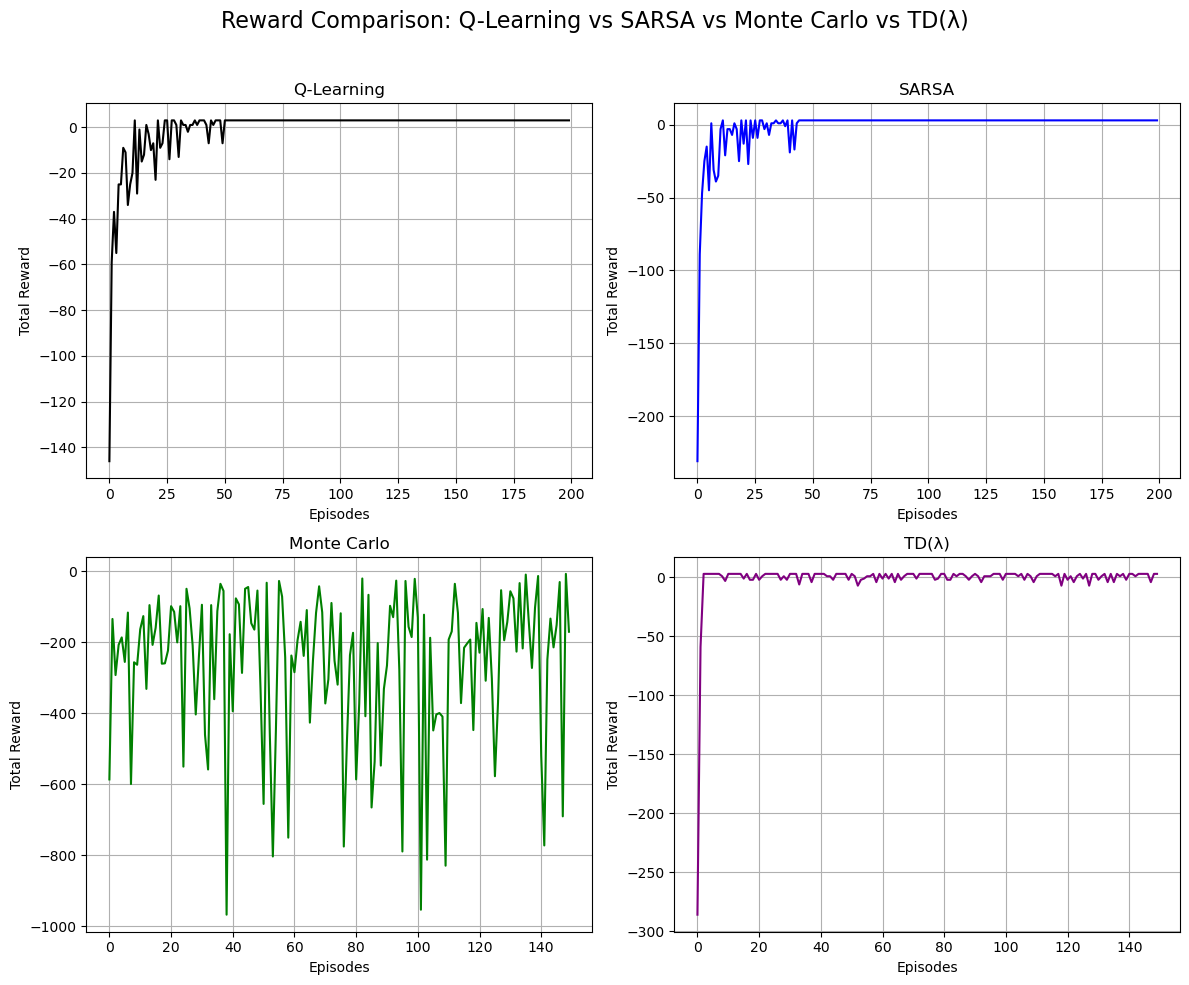

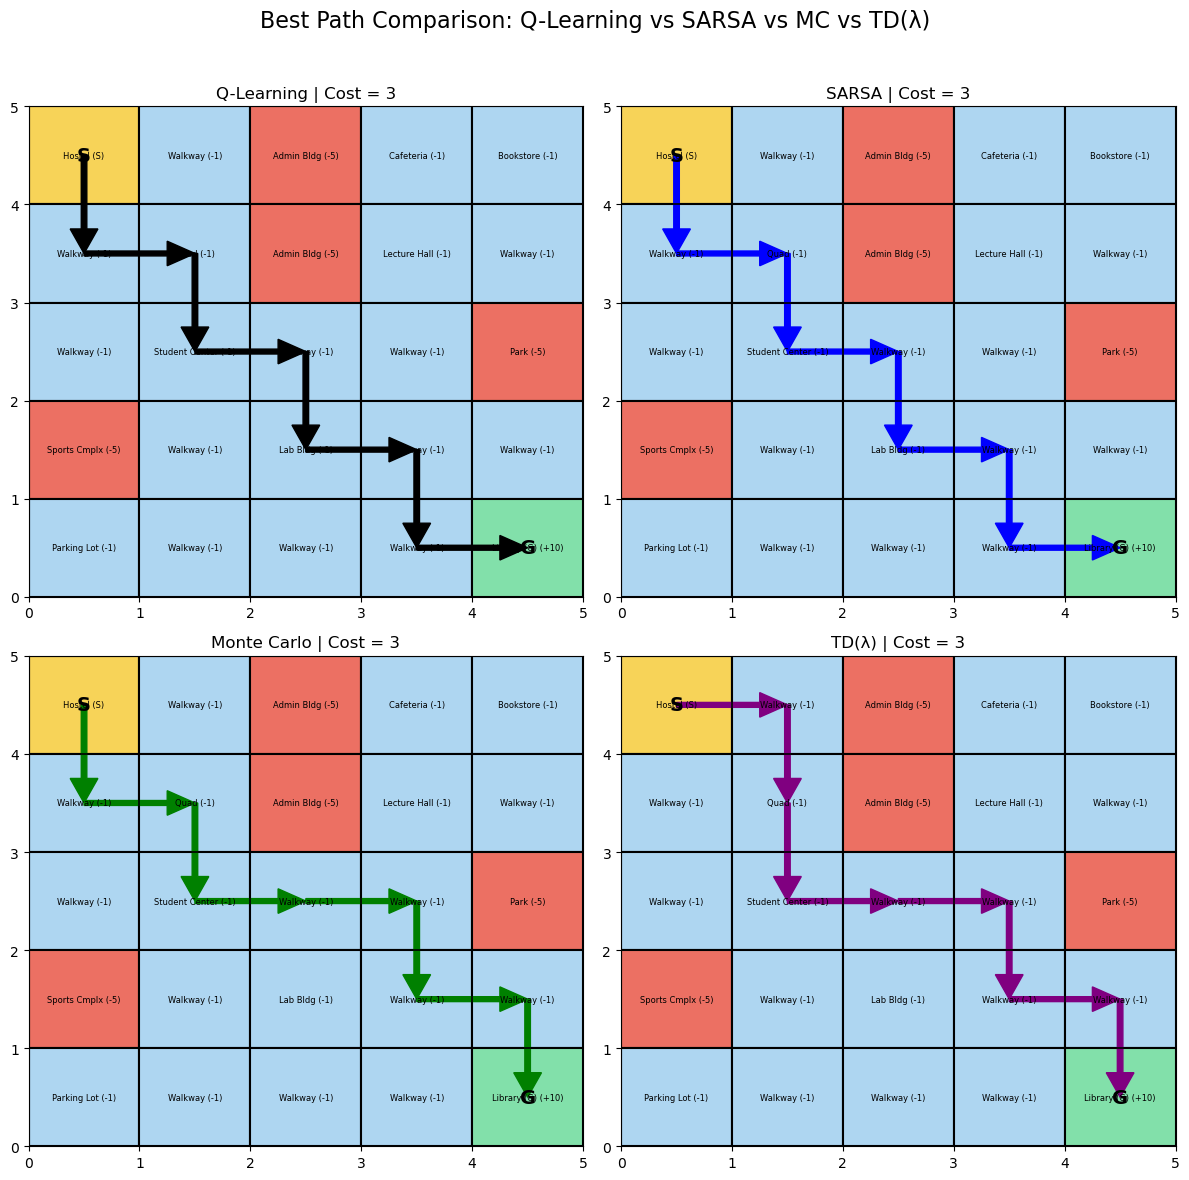

In [27]:
# ============================================================
#               FINAL COMPARISON CODE (ALL METHODS)
# ============================================================

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

# ============================================================
#  REWARD COMPARISON (2 × 2 SUBPLOTS)
# ============================================================

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Reward Comparison: Q-Learning vs SARSA vs Monte Carlo vs TD(λ)", fontsize=16)

ax[0, 0].plot(q_rewards, color='black')
ax[0, 0].set_title("Q-Learning")
ax[0, 0].set_xlabel("Episodes")
ax[0, 0].set_ylabel("Total Reward")
ax[0, 0].grid()

ax[0, 1].plot(sarsa_rewards, color='blue')
ax[0, 1].set_title("SARSA")
ax[0, 1].set_xlabel("Episodes")
ax[0, 1].set_ylabel("Total Reward")
ax[0, 1].grid()

ax[1, 0].plot(mc_rewards, color='green')
ax[1, 0].set_title("Monte Carlo")
ax[1, 0].set_xlabel("Episodes")
ax[1, 0].set_ylabel("Total Reward")
ax[1, 0].grid()

ax[1, 1].plot(rewards, color='purple')
ax[1, 1].set_title("TD(λ)")
ax[1, 1].set_xlabel("Episodes")
ax[1, 1].set_ylabel("Total Reward")
ax[1, 1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# ============================================================
# Helper functions for path plots (Do NOT repeat environment)
# ============================================================

def draw_base_grid(ax):
    """Draws the 5×5 campus grid using your cell_color() + obstacles."""
    for r in range(rows):
        for c in range(cols):
            ax.add_patch(Rectangle(
                (c, rows - 1 - r),
                1, 1,
                facecolor=cell_color((r, c)),
                edgecolor='black',
                linewidth=1.5
            ))

            # add labels
            if (r, c) in cell_labels:
                ax.text(
                    c + 0.5, rows - 1 - r + 0.5,
                    cell_labels[(r, c)],
                    ha='center', va='center', fontsize=6, wrap=True
                )

    ax.set_xticks(range(cols + 1))
    ax.set_yticks(range(rows + 1))
    ax.grid(True, color='black', linewidth=1.2)


def draw_path(ax, path, color):
    """Draws agent best path with arrows."""
    for i in range(len(path) - 1):
        r1, c1 = path[i]
        r2, c2 = path[i + 1]

        ax.add_patch(FancyArrow(
            c1 + 0.5,
            rows - 1 - r1 + 0.5,
            (c2 - c1),
            -(r2 - r1),
            width=0.05,
            head_width=0.25,
            head_length=0.25,
            color=color,
            length_includes_head=True
        ))

    # Mark Start and Goal
    ax.text(START[1] + 0.5, rows - 1 - START[0] + 0.5, 'S',
            ha='center', va='center', fontsize=14, fontweight='bold')

    ax.text(GOAL[1] + 0.5, rows - 1 - GOAL[0] + 0.5, 'G',
            ha='center', va='center', fontsize=14, fontweight='bold')


# ============================================================
#  PATH COMPARISON (2 × 2 SUBPLOTS)
# ============================================================

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Best Path Comparison: Q-Learning vs SARSA vs MC vs TD(λ)", fontsize=16)

# ---- Q-Learning ----
draw_base_grid(ax[0, 0])
draw_path(ax[0, 0], path_q, 'black')
ax[0, 0].set_title(f"Q-Learning | Cost = {cost_q}")

# ---- SARSA ----
draw_base_grid(ax[0, 1])
draw_path(ax[0, 1], path_s, 'blue')
ax[0, 1].set_title(f"SARSA | Cost = {cost_s}")

# ---- Monte Carlo ----
draw_base_grid(ax[1, 0])
draw_path(ax[1, 0], path_mc, 'green')
ax[1, 0].set_title(f"Monte Carlo | Cost = {cost_mc}")

# ---- TD(λ) ----
draw_base_grid(ax[1, 1])
draw_path(ax[1, 1], path, 'purple')
ax[1, 1].set_title(f"TD(λ) | Cost = {total_cost}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
